In [282]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [283]:
df_train = pd.read_csv('titanicdata.csv')
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
df_train.shape

(891, 12)

In [285]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [286]:
df_train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [287]:
df_train.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

In [ ]:
#Filling in missing values
df_train['age'].fillna(df_train['age'].median(), inplace=True)


In [288]:
df_train['embarked'].value_counts()

embarked
S    644
C    168
Q     77
       2
Name: count, dtype: int64

In [290]:
# Strip spaces and convert any non-standard values to NaN
df_train['embarked'] = df_train['embarked'].replace(r'^\s*$', np.nan, regex=True)

# Fill NaN values with the most common embarkation point
df_train['embarked'].fillna(df_train['embarked'].mode()[0], inplace=True)

df_train['embarked'].value_counts()


embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [273]:
df_train['embarked'].value_counts()

embarked
S    644
C    168
Q     77
       2
Name: count, dtype: int64

In [215]:
#Drop cabin, too many missing values
df_train.drop(columns=['cabin'], inplace=True)

In [216]:
#Feature engineering
df_train['family_size'] = df_train['sibsp'] + df_train['parch'] + 1
df_train['is_alone'] = (df_train['family_size']==1).astype(int)

In [217]:
df_train.isna().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
family_size    0
is_alone       0
dtype: int64

In [218]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [219]:
X = df_train[['pclass', 'sex', 'age','embarked','family_size','is_alone']]
y = df_train['survived']

In [220]:
(X.shape,y.shape)

((891, 6), (891,))

In [221]:
X.dtypes

pclass           int64
sex             object
age            float64
embarked        object
family_size      int64
is_alone         int32
dtype: object

In [222]:
for col in X.columns:
    if X[col].dtype == object and  X[col].nunique() > 1:
        dummies = pd.get_dummies(X[col], drop_first=True).astype(float)
        X.drop(columns=[col], inplace = True)
        X = pd.concat([X, dummies], axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6904\980141932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=[col], inplace = True)


In [223]:
X.head()

,pclass,age,family_size,is_alone,male,C,Q,S
0,3,22.0,2,0,1.0,0.0,0.0,1.0
1,1,38.0,2,0,0.0,1.0,0.0,0.0
2,3,26.0,1,1,0.0,0.0,0.0,1.0
3,1,35.0,2,0,0.0,0.0,0.0,1.0
4,3,35.0,1,1,1.0,0.0,0.0,1.0


In [224]:
df_train['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

#### Exploratory Data Analysis


Text(0.5, 1.0, 'Survival Count')

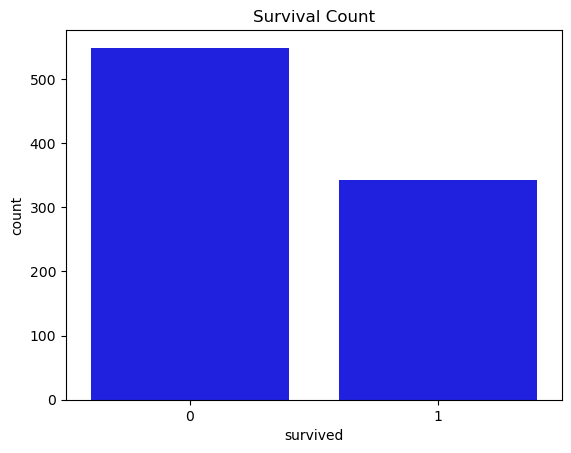

In [225]:
sns.countplot(x='survived', data=df_train,color='blue')
plt.title('Survival Count')

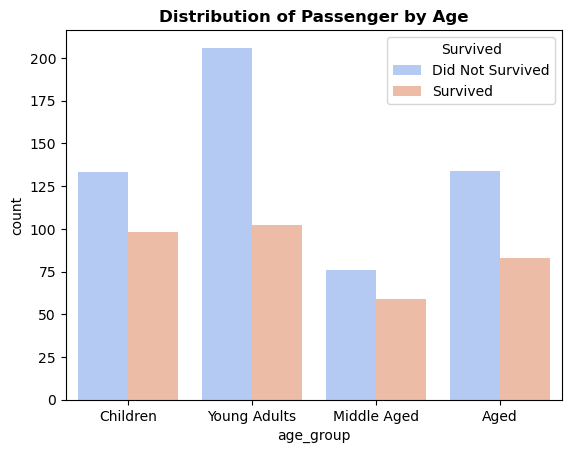

In [226]:
df_train['age_group']=age_group = pd.qcut(df_train['age'], q=4,labels=['Children', 'Young Adults', 'Middle Aged', 'Aged'])
sns.countplot(x='age_group', hue='survived', data=df_train, palette='coolwarm')
plt.title('Distribution of Passenger by Age', fontweight='bold', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survived', 'Survived'])

Text(0.5, 1.0, 'Percentage Survival per Age Group')

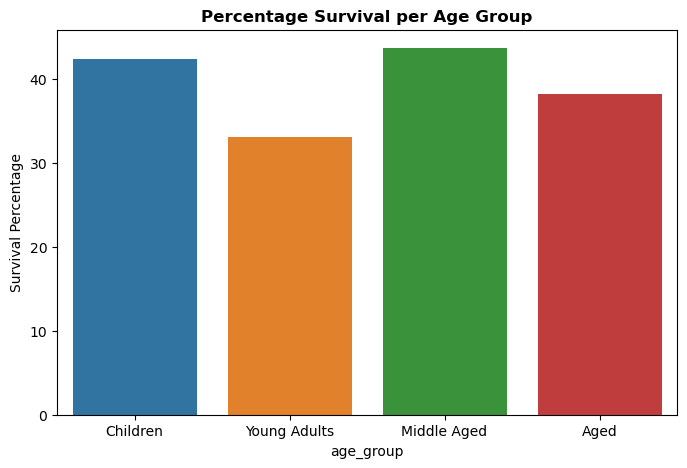

In [227]:
#Percentage Survival per age group
total_count_age_group = df_train.groupby('age_group')['survived'].count()
survival_count_age_group = df_train.groupby('age_group')['survived'].sum()
survival_percentage = (survival_count_age_group/total_count_age_group)*100

plt.figure(figsize=(8,5))
sns.barplot(x=survival_percentage.index, y=survival_percentage.values)
plt.ylabel('Survival Percentage')
plt.title('Percentage Survival per Age Group', fontweight='bold')


# Insights on Survival Rates by Age Group

The survival percentages for different age groups are as follows:

- **Children:** 42.42%
- **Young Adults:** 33.12%
- **Middle Aged:** 43.70%
- **Aged:** 38.25%

## Key Observations:

1. **Higher Survival Rates for Children and Middle-Aged Individuals**
   - Children (42.42%) and Middle-Aged individuals (43.70%) have the highest survival rates.
   - This suggests that priority may have been given to children during rescue efforts.
   - Middle-aged individuals might have had better survival instincts or access to resources.

2. **Lowest Survival Rate Among Young Adults (33.12%)**
   - The survival rate for Young Adults is the lowest among all groups.
   - Possible reasons:
     - They might not have been prioritized for rescue efforts.
     - Could include a large portion of third-class passengers .


### Survivors among different classes


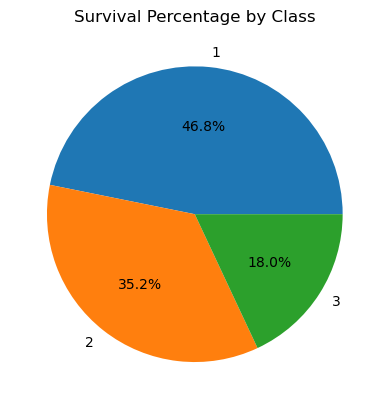

In [228]:
#Total number of pasengers in each class
total_passenger_class = df_train.groupby('pclass')['survived'].count()
survivors_per_class = df_train.groupby('pclass')['survived'].sum()
percentage_survival_class = (survivors_per_class/total_passenger_class)*100

plt.pie(percentage_survival_class, labels=percentage_survival_class.index, autopct='%1.1f%%')
plt.title('Survival Percentage by Class')
plt.show()

# Summary of Survival by Passenger Class

- **1st Class (62.96%)** had the highest survival rate, likely due to **better access to lifeboats and priority in rescue efforts**.  
- **2nd Class (47.28%)** had a moderate survival rate, benefiting from **better conditions than 3rd class but lower priority than 1st class**.  
- **3rd Class (24.24%)** had the lowest survival rate, possibly due to **restricted access to lifeboats, lower deck cabins, and socio-economic disadvantages**.  

### Key Takeaway:  
Survival chances were **significantly influenced by passenger class**, with higher-class passengers having a clear advantage in rescue efforts.


#### Survival Rate based on gender among the various classes

In [229]:
#Male survivors in each class
male_survivors = df_train[df_train['sex'] == 'male'].groupby('pclass')['survived'].sum()
#Total male passengers in class
total_male_passengers_class = df_train[df_train['sex']=='male'].groupby('pclass').size() 
#male_surviver_percentage_class 
male_survival_percentage_class = (male_survivors/total_male_passengers_class)*100

#female survivors in each class
female_survivors = df_train[df_train['sex']=='female'].groupby('pclass')['survived'].sum()
#Total female passengers in class
total_female_passengers_class = df_train[df_train['sex']=='female'].groupby('pclass').size() 
#female_surviver_percentage_class 
female_survival_percentage_class = (female_survivors/total_female_passengers_class)*100

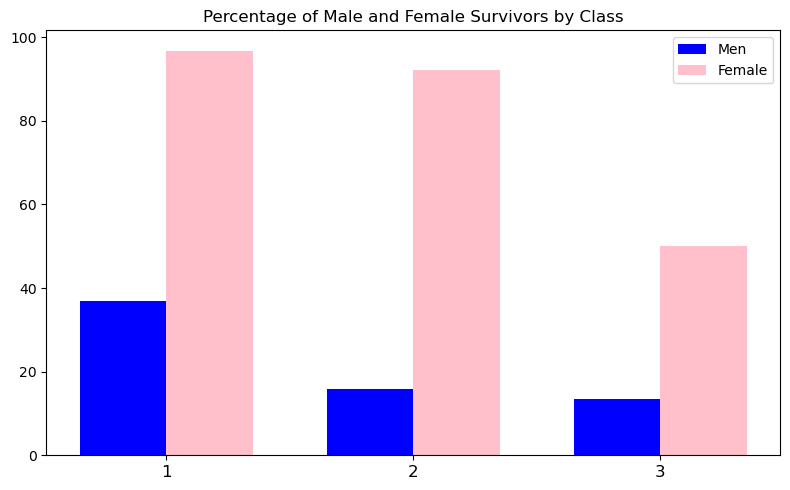

In [230]:
#Plotting the total passengers who survived based on gender and class
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(len(male_survival_percentage_class))
bar_width = 0.35
#Plot bars
rect1 = ax.bar(index, male_survival_percentage_class, bar_width, color='b', label='Men')
rect2 = ax.bar(index+bar_width, female_survival_percentage_class, bar_width, color='pink', label='Female')
#Labels and layout
ax.set_label('Survivor Percentage')
ax.set_title('Percentage of Male and Female Survivors by Class')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(male_survival_percentage_class.index.values, fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

In [231]:
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'family_size', 'is_alone',
       'age_group'],
      dtype='object')

# Insights on Survival Percentage by Gender and Class
### **Key Takeaway**  
- **Women had a much higher survival rate than men across all classes.** 
- **More than 90% of female passengers in the first and second class survived** 
- **Higher-class passengers had better survival chances, but gender was the strongest survival factor.**  
- The **"Women and Children First"** policy played a significant role in survival outcomes.  

#### Percentage of urvivors among the various classes with family aboard

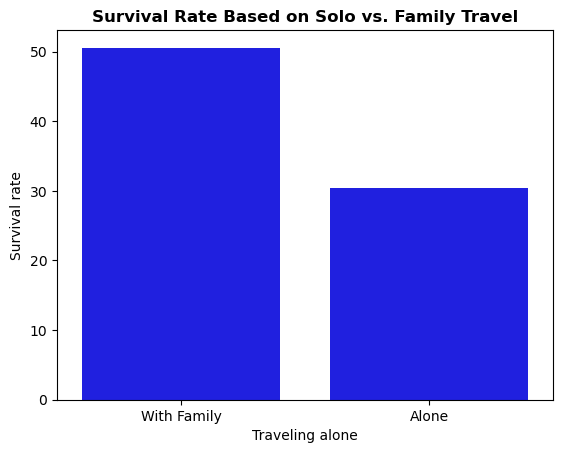

In [232]:
survival_by_family_presence = df_train.groupby('is_alone')['survived'].mean()*100
sns.barplot(x = survival_by_family_presence.index, y = survival_by_family_presence.values, color='b')
plt.title("Survival Rate Based on Solo vs. Family Travel", fontweight='bold', fontsize=12)

plt.xlabel('Traveling alone')
plt.ylabel('Survival rate')
plt.xticks([0,1], ['With Family', 'Alone'])
plt.show()

# **Insights on Survival Based on Traveling Alone**

### **1. Observations**
✔ **Passengers with family had a significantly higher survival rate** compared to those who were alone.  
✔ This suggests that **family members may have helped each other** during evacuation.  
✔ **Solo travelers were more vulnerable**, possibly due to **lack of assistance** or **lower priority during rescue efforts**.  

### **2. Possible Reasons**
- **Emotional & Physical Support:** Families could assist each other in reaching lifeboats.  
- **Women & Children First:** Family units likely had women/children, who were prioritized.  
- **Disadvantage for Lone Males:** Most solo travelers were men, who had **lower survival rates overall**.  

### Survival by embarkation port

Text(0, 0.5, 'Survival Rate')

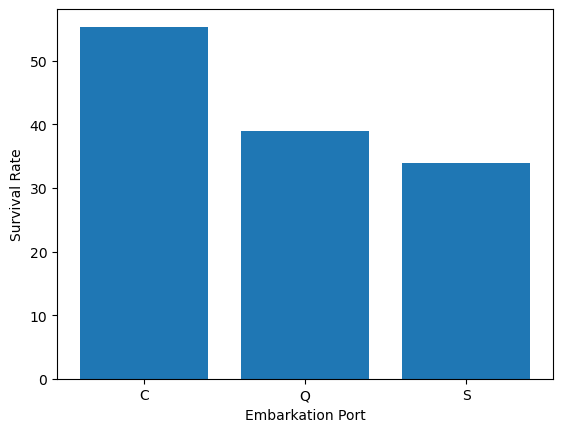

In [278]:
survived_embarked = df_train.groupby('embarked')['survived'].sum()
total_embarked = df_train.groupby('embarked')['passengerid'].size()
percentage_survival_embarkation = (survived_embarked/total_embarked)*100

plt.bar(percentage_survival_embarkation.index, percentage_survival_embarkation.values)
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')

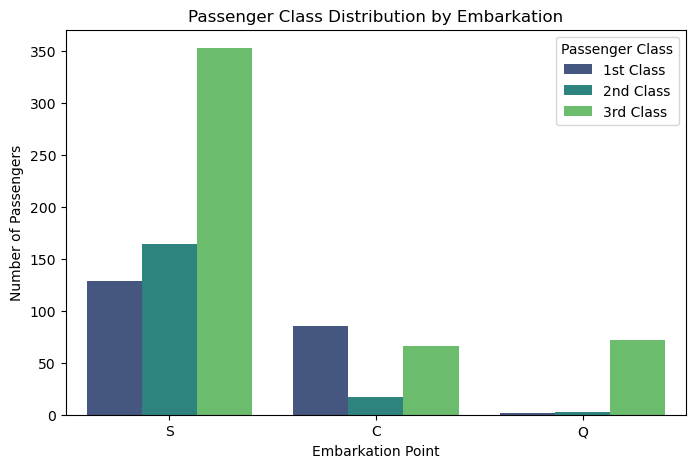

In [280]:

plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='embarked', hue='pclass', palette='viridis')

plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.title('Passenger Class Distribution by Embarkation')
plt.legend(title='Passenger Class', labels=['1st Class', '2nd Class', '3rd Class'])

plt.show()


# **Insights on Survival Rates by Embarkation Point **

### **1. Survival Rates**
- **Cherbourg (C):**  **55.36% survived**  
- **Queenstown (Q):** **38.96% survived**  
- **Southampton (S):** **33.90% survived**  

### **2. Key Observations**
✔ **Passengers who embarked at Cherbourg had the highest survival rate (55.36%)**.  
✔ **Those from Southampton had the lowest survival rate (33.90%)**.  
✔ **Queenstown passengers had a mid-range survival rate (38.96%)**.

### **3. Possible Reasons**
- **Cherbourg had more first-class passengers**, who had better survival chances.  
- **Southampton had the most third-class passengers**, who were less likely to survive.  
- **Queenstown had a mix but leaned toward third-class, explaining the intermediate survival rate**.

### **4. Takeaway**
 **Embarkation location influenced survival, likely due to class distribution and lifeboat access.**  


### Final Takeway
Survival on the titanic was not random. Key factors included:
* Gender 
* Class
* Age
* Family
* Enbarkation Port

In [235]:
#Split data into Train & Test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((712, 8), (179, 8), (712,), (179,))

In [236]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Counter(y_train)


Counter({0: 441, 1: 271})

In [237]:
#Applying SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [238]:
#After smote
Counter(y_train_smote)

Counter({0: 441, 1: 441})

In [239]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)  # Fit & transform on training data
X_test_scaled = scaler.transform(X_test) 

In [240]:
#Apply PCA(keep 95% of variance)
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [241]:
X.shape[1], X_train_pca.shape[1]

(8, 6)

In [242]:
#Train Random Forest on SMOTE data(No PCA)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
#Perform grid search
rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf.fit(X_train_scaled, y_train_smote) 

best_rf = rf.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [243]:
#Train XGBoost on SMOTE data(No PCA)
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Train Logistic Regression on smote data(No PCA)
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train_scaled, y_train_smote)

LogisticRegression(max_iter=500, random_state=42)

In [245]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

svm_model.fit(X_train_scaled, y_train_smote)

SVC(C=1, random_state=42)

Train Logistic Regression and SVM with(PCA) - Cannot handle high dimensionality

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Train Logistic Regression on PCA-transformed- data
lr_model_pca = LogisticRegression(max_iter=500, random_state=42)
lr_model_pca.fit(X_train_pca, y_train_smote)

LogisticRegression(max_iter=500, random_state=42)

In [247]:
#Train SVM on PCA_transformed data
svm_model_pca = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model_pca.fit(X_train_pca, y_train_smote)

SVC(C=1, random_state=42)

In [248]:
X_test_pca.shape, X_train_pca.shape

((179, 6), (882, 6))

In [249]:
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_lr_pca = lr_model_pca.predict(X_test_pca)
y_pred_svm_pca= svm_model_pca.predict(X_test_pca)

In [250]:
#Evaluating the model performance
print("Accuracy scores")
print(f"Random Forest: {accuracy_score(y_test,y_pred_rf)}")
print(f"XGBoost: {accuracy_score(y_test, y_pred_xgb)}")
print(f'Logistic Regression(No PCA): {accuracy_score(y_test,y_pred_lr)}')
print(f'SVM(No PCA): {accuracy_score(y_test,y_pred_svm)}')
print(f'Logistic Regression(PCA): {accuracy_score(y_test,y_pred_lr_pca)}')
print(f'svm(PCA): {accuracy_score(y_test,y_pred_svm_pca)}')

Accuracy scores
Random Forest: 0.8044692737430168
XGBoost: 0.7877094972067039
Logistic Regression(No PCA): 0.8324022346368715
SVM(No PCA): 0.8044692737430168
Logistic Regression(PCA): 0.8268156424581006
svm(PCA): 0.8100558659217877


In [251]:
# Print classification reports for all models
models = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Logistic Regression (No PCA)": y_pred_lr,
    "SVM (No PCA)": y_pred_svm,
    "Logistic Regression (PCA)": y_pred_lr_pca,
    "SVM (PCA)": y_pred_svm_pca,
}

for model_name, y_pred in models.items():
    print(f"\n🔹 Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))



🔹 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       108
           1       0.79      0.69      0.74        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


🔹 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       108
           1       0.75      0.69      0.72        71

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179


🔹 Classification Report for Logistic Regression (No PCA):

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       108
           1       0.78      0.80      0.79        71

    accuracy                          

#### Key Takeaways 
* Logistic Regression (No PCA & PCA) performed best overall (83% accuracy, balanced recall).  
* SVM & Random Forest did well, but struggled with recall for class 1 (survivors). 
* PCA slightly helped Logistic Regression but didn't improve SVM much.  
* XGBoost was slightly weaker in recall & accuracy than Random Forest. 


### Computing ROC Curves and AUC score

In [252]:
from sklearn.metrics import roc_curve, roc_auc_score

In [253]:
# Get probability scores for models that support it
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_prob_svm = svm_model.decision_function(X_test_scaled)  # SVM uses decision function
y_prob_lr_pca = lr_model_pca.predict_proba(X_test_pca)[:, 1]
y_prob_svm_pca = svm_model_pca.decision_function(X_test_pca)


In [254]:
# Compute ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_lr_pca, tpr_lr_pca, _ = roc_curve(y_test, y_prob_lr_pca)
fpr_svm_pca, tpr_svm_pca, _ = roc_curve(y_test, y_prob_svm_pca)

# Compute AUC Scores
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_svm = roc_auc_score(y_test, y_prob_svm)
auc_lr_pca = roc_auc_score(y_test, y_prob_lr_pca)
auc_svm_pca = roc_auc_score(y_test, y_prob_svm_pca)


In [255]:
# Store AUC scores in a dictionary
auc_scores = {
    "Random Forest": auc_rf,
    "XGBoost": auc_xgb,
    "Logistic Regression (No PCA)": auc_lr,
    "SVM (No PCA)": auc_svm,
    "Logistic Regression (PCA)": auc_lr_pca,
    "SVM (PCA)": auc_svm_pca
}

# Print dictionary
auc_scores


{'Random Forest': 0.8757172665623371,
 'XGBoost': 0.8603286384976526,
 'Logistic Regression (No PCA)': 0.8754564423578509,
 'SVM (No PCA)': 0.837245696400626,
 'Logistic Regression (PCA)': 0.8834115805946792,
 'SVM (PCA)': 0.8365936358894105}

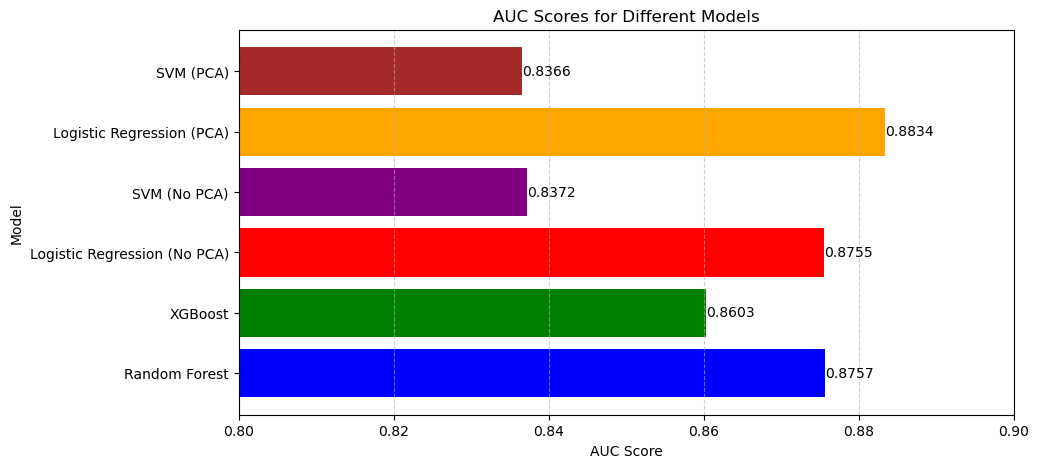

In [256]:
import matplotlib.pyplot as plt

# AUC dictionary
auc_scores = {
    "Random Forest": 0.8757,
    "XGBoost": 0.8603,
    "Logistic Regression (No PCA)": 0.8755,
    "SVM (No PCA)": 0.8372,
    "Logistic Regression (PCA)": 0.8834,
    "SVM (PCA)": 0.8366
}

# Plot
plt.figure(figsize=(10, 5))
plt.barh(list(auc_scores.keys()), list(auc_scores.values()), color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel("AUC Score")
plt.ylabel("Model")
plt.title("AUC Scores for Different Models")
plt.xlim(0.8, 0.9)  # Adjusting x-axis for better visibility
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Display values on bars
for index, value in enumerate(auc_scores.values()):
    plt.text(value, index, f"{value:.4f}", va="center", fontsize=10)

plt.show()


### Summary - AUC
* Logistic Regression (PCA) performed best (AUC = 0.8834)

* PCA slightly improved the AUC score over the No PCA version (0.8755).

* This suggests that PCA helped remove noise and improve generalization.

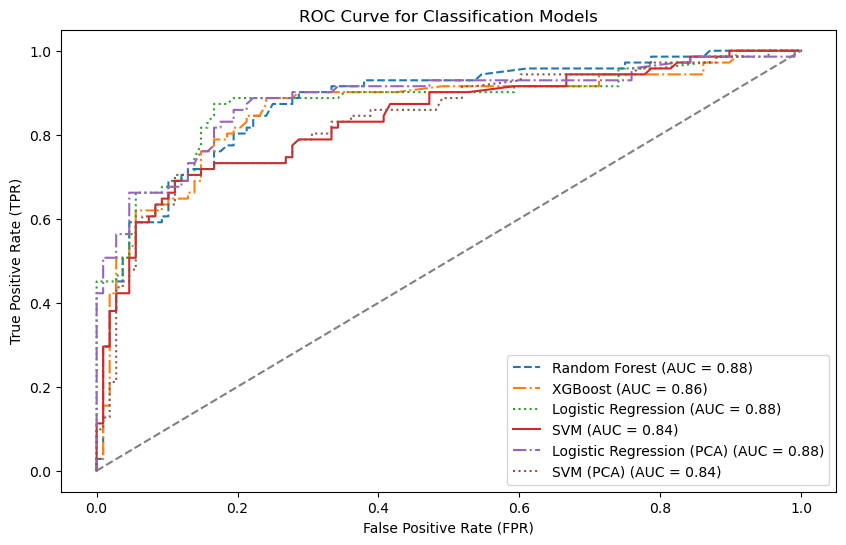

In [257]:
plt.figure(figsize=(10, 6))

# Plot ROC curves for each model
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle='--')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle='-.')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", linestyle=':')
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", linestyle='-')
plt.plot(fpr_lr_pca, tpr_lr_pca, label=f"Logistic Regression (PCA) (AUC = {auc_lr_pca:.2f})", linestyle='dashdot')
plt.plot(fpr_svm_pca, tpr_svm_pca, label=f"SVM (PCA) (AUC = {auc_svm_pca:.2f})", linestyle='dotted')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Classification Models")
plt.legend()
plt.show()


### Interpretation - ROC
* Logistic Regression is a better model. 
* The curve is closer to the top-left corner(has higher TPR and lower FPR) indicating it is the strongest classifier